## Credit Risk Analysis 

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score, confusion_matrix
from sklearn.impute import SimpleImputer
import seaborn as sns

In [15]:
data= pd.read_csv("credit_risk.csv")

In [16]:
data.head(10)


,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
5,5,21,9900,OWN,2.0,VENTURE,2500,7.14,1,0.25,N,2
6,6,26,77100,RENT,8.0,EDUCATION,35000,12.42,1,0.45,N,3
7,7,24,78956,RENT,5.0,MEDICAL,35000,11.11,1,0.44,N,4
8,8,24,83000,RENT,8.0,PERSONAL,35000,8.90,1,0.42,N,2
9,9,21,10000,OWN,6.0,VENTURE,1600,14.74,1,0.16,N,3


In [17]:
data.tail(10)

,Id,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
32571,32571,60,45600,RENT,1.0,VENTURE,20000,10.00,1,0.44,N,26
32572,32572,52,52000,OWN,0.0,PERSONAL,9600,8.49,0,0.18,N,22
32573,32573,56,90000,MORTGAGE,0.0,PERSONAL,7200,6.17,0,0.08,N,19
32574,32574,52,65004,RENT,4.0,PERSONAL,20000,15.58,1,0.31,Y,19
32575,32575,52,64500,RENT,0.0,EDUCATION,5000,11.26,0,0.08,N,20
32576,32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26
32580,32780,66,42000,RENT,2.0,MEDICAL,6475,9.99,0,0.15,N,30


In [18]:
data.drop(columns=["Id"])

,Age,Income,Home,Emp_length,Intent,Amount,Rate,Status,Percent_income,Default,Cred_length
0,22,59000,RENT,123.0,PERSONAL,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,15000,11.48,0,0.10,N,26


In [19]:
data=pd.get_dummies(data,columns=["Home","Intent","Default"])

In [20]:
data

,Id,Age,Income,Emp_length,Amount,Rate,Status,Percent_income,Cred_length,Home_MORTGAGE,...,Home_OWN,Home_RENT,Intent_DEBTCONSOLIDATION,Intent_EDUCATION,Intent_HOMEIMPROVEMENT,Intent_MEDICAL,Intent_PERSONAL,Intent_VENTURE,Default_N,Default_Y
0,0,22,59000,123.0,35000,16.02,1,0.59,3,0,...,0,1,0,0,0,0,1,0,0,1
1,1,21,9600,5.0,1000,11.14,0,0.10,2,0,...,1,0,0,1,0,0,0,0,1,0
2,2,25,9600,1.0,5500,12.87,1,0.57,3,1,...,0,0,0,0,0,1,0,0,1,0
3,3,23,65500,4.0,35000,15.23,1,0.53,2,0,...,0,1,0,0,0,1,0,0,1,0
4,4,24,54400,8.0,35000,14.27,1,0.55,4,0,...,0,1,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,32576,57,53000,1.0,5800,13.16,0,0.11,30,1,...,0,0,0,0,0,0,1,0,1,0
32577,32577,54,120000,4.0,17625,7.49,0,0.15,19,1,...,0,0,0,0,0,0,1,0,1,0
32578,32578,65,76000,3.0,35000,10.99,1,0.46,28,0,...,0,1,0,0,1,0,0,0,1,0
32579,32579,56,150000,5.0,15000,11.48,0,0.10,26,1,...,0,0,0,0,0,0,1,0,1,0


In [22]:
impute= SimpleImputer(strategy="mean")
data_imp= pd.DataFrame(impute.fit_transform(data),columns=data.columns)

In [25]:
X=data_imp.drop(columns=['Status'])
Y=data_imp['Status']

## RandomForest Classifier

In [31]:
xtrain,xtest,ytrain,ytest= train_test_split(X,Y,test_size=0.2,random_state=37)

In [32]:
rf_classifier= RandomForestClassifier(n_estimators=100,random_state=37)

In [34]:
rf_classifier.fit(xtrain,ytrain)

RandomForestClassifier(random_state=37)

In [35]:
ypred= rf_classifier.predict(xtest)

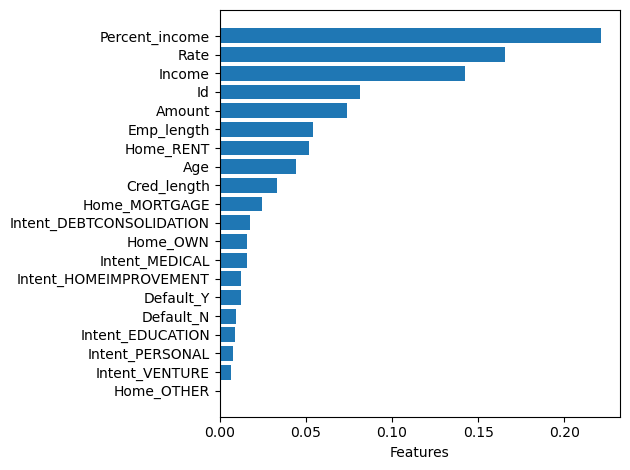

In [47]:
features=rf_classifier.feature_importances_
feature_name=X.columns
sorted_idx=np.argsort(features)
plt.figure()
plt.barh(range(len(sorted_idx)),features[sorted_idx],align='center')
plt.yticks(range(len(sorted_idx)),[feature_name[i] for i in sorted_idx] )
plt.xlabel("Features")
plt.tight_layout()
plt.show()

In [50]:
acc= accuracy_score(ytest, ypred)


In [60]:
#classification report
report= classification_report(ytest,ypred)
print("The accuracy obtained is: ",acc)

The accuracy obtained is:  0.923584471382538


In [62]:
print("Classification Report: \n",report)

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.92      0.99      0.95      5108
         1.0       0.94      0.69      0.80      1409

    accuracy                           0.92      6517
   macro avg       0.93      0.84      0.87      6517
weighted avg       0.92      0.92      0.92      6517

